In [19]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory


In [20]:
#参数设置
train_file = "C:/Users/Administrator/Desktop/deep learning experients/a9a.svm"
valid_file = "C:/Users/Administrator/Desktop/deep learning experients/a9a.t"
#学习率
learning_rate = 0.1 
#迭代次数
num_iter = 200
#每次训练的batch
k = 200  
#逻辑回归参数
eta = 0.001
gamma = 0.9
eps = 1e-8
beta=0.9


In [21]:
#读取数据
def get_data(filename):
    data = load_svmlight_file(filename)
    X=data[0].toarray()
    y=data[1]
    count = X.shape[0]
    if filename=='C:/Users/Administrator/Desktop/deep learning experients/a9a.t':
        X = np.column_stack((X, np.zeros((count, 1))))
    np.c_[X, np.ones(count)]
    return [X,y]

In [22]:
def sigmoid(inX):
    return 1.0/(1.0+exp(-inX))


In [23]:
def NAG_stocGradAscent(dataMatrix, classLabels, X1, y1, weights):

    m,n = shape(dataMatrix)
    new_weights = weights
    Loss_valid = []
    v = zeros(n) 
    # NAG,初始化是否为零？
    for j in range(num_iter):
        loss_valid = compute_loss(new_weights, X1, y1)
        Loss_valid.append(float(loss_valid))
        if j%10==0:
            print('iteration {0}: valid_loss={1}'.format(j, float(loss_valid)))
        dataIndex = list(range(m))
        for i in range(k):
            weights_grad = zeros(n)  # initialize to all ones
            temp_weights = new_weights - gamma * v
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*temp_weights))
            error = np.maximum(classLabels[randIndex], 0.0) - h
            weights_grad = - error * dataMatrix[randIndex]
            del (dataIndex[randIndex])
            v = gamma * v + eta * weights_grad
            new_weights = new_weights - v

    return [new_weights, Loss_valid]


In [24]:
def RMSProp_stocGradAscent(dataMatrix, classLabels, X1, y1, weights):

    m,n = shape(dataMatrix)
    new_weights = weights
    Loss_valid = []
    g = zeros(n) 
    # RMSProp,每次初始化是否为零？
    for j in range(num_iter):
        loss_valid = compute_loss(new_weights, X1, y1)
        Loss_valid.append(float(loss_valid))
        if j%10==0:
            print('iter {0}: valid_loss={1}'.format(j, float(loss_valid)))
        dataIndex = list(range(m))
        epsilon = ones(n)*eps
        weights_grad = zeros(n)  
        # initialize to all ones
        for i in range(k):
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * new_weights))
            error = np.maximum(classLabels[randIndex], 0.0) - h
            weights_grad = weights_grad - error * dataMatrix[randIndex]
            del (dataIndex[randIndex])

        g = gamma * g + (1 - gamma) * square(weights_grad/k)
        new_weights = new_weights - eta * weights_grad / sqrt(g + epsilon)

    return [new_weights, Loss_valid]

In [25]:
def AdaDelta_stocGradAscent(dataMatrix, classLabels, X1, y1, weights):

    m,n = shape(dataMatrix)
    new_weights = weights
    Loss_valid = []
    g = zeros(n)  
    # RMSProp,每次初始化是否为零？
    delta = zeros(n)    
    #delta
    for j in range(num_iter):
        loss_valid = compute_loss(new_weights, X1, y1)
        Loss_valid.append(float(loss_valid))
        if j%10==0:
            print('iter {0}: valid_loss={1}'.format(j, float(loss_valid)))
        dataIndex = list(range(m))
        epsilon = ones(n)*eps
        weights_grad = zeros(n) 
        # initialize to all ones
        for i in range(k):           
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * new_weights))
            error = np.maximum(classLabels[randIndex], 0.0) - h
            weights_grad = weights_grad - error * dataMatrix[randIndex]
            del (dataIndex[randIndex])

        weights_grad = weights_grad / k
        g = gamma * g + (1 - gamma) * square(weights_grad)
        dx = sqrt(delta + epsilon) / sqrt(g + epsilon)
        new_weights = new_weights - dx * weights_grad
        delta = gamma * delta + (1-gamma) * square(dx * weights_grad)

    return [new_weights, Loss_valid]

In [26]:
def Adam_stocGradAscent(dataMatrix, classLabels, X1, y1, weights):

    m,n = shape(dataMatrix)
    new_weights = weights
    Loss_valid = []
    g = zeros(n)  
    # RMSProp,每次初始化是否为零？
    moments = zeros(n)    
    #moments
    for j in range(num_iter):
        loss_valid = compute_loss(new_weights, X1, y1)
        Loss_valid.append(float(loss_valid))
        if j%10==0:
            print('iter {0}: valid_loss={1}'.format(j, float(loss_valid)))
        dataIndex = list(range(m))
        epsilon = ones(n)*eps
        weights_grad = zeros(n) 
        # initialize to all ones
        for i in range(k):
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * new_weights))
            error = np.maximum(classLabels[randIndex], 0.0) - h
            weights_grad = weights_grad - error * dataMatrix[randIndex]
            del (dataIndex[randIndex])

        weights_grad = weights_grad / k
        g = gamma * g + (1 - gamma) * square(weights_grad)
        moments = beta * moments + (1 - beta) * weights_grad
        alpha = eta * sqrt(1 - gamma**(j+1)) / (1 - beta**(j+1))
        new_weights = new_weights - alpha * moments / sqrt(g + epsilon)

    return [new_weights, Loss_valid]

In [27]:
def compute_loss(weights, dataMatrix, classLabels):

    totalError = 0.0
    count = dataMatrix.shape[0]
    for i in range(0, count):
        h = sigmoid(sum(dataMatrix[i]*weights))
        totalError = totalError-np.maximum(classLabels[i],0)*log(h)-(1-np.maximum(classLabels[i],0))*log(1-h)

    return totalError/float(count)

In [28]:
def NAG_plot_loss(y):
    n = len(y)
    plt.title('drawing graph of L_NAG  with the number of iterations In a9a and a9at data')
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.plot(range(n), array(y), color='r', label='L_NAG')
    plt.show()


In [29]:
def RMSProp_plot_loss(y):
    n = len(y)
    plt.title('drawing graph of L_RMSProp  with the number of iterations In a9a and a9at data')
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.plot(range(n), array(y), color='y', label='L_RMSProp')
    plt.show()

In [30]:
def AdaDelta_plot_loss(y):
    n = len(y)
    plt.title('drawing graph of L_AdaDelta  with the number of iterations In a9a and a9at data')
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.plot(range(n), array(y), color='g', label='L_AdaDelta')
    plt.show()

In [31]:
def Adam_plot_loss(y):
    n = len(y)
    plt.title('drawing graph of L_Adam  with the number of iterations In a9a and a9at data')
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.plot(range(n), array(y), color='b', label='L_Adam')
    plt.show()

In [32]:
def NAG_logistic_regression():

    # 参数初始化
    loss_valid = []
    X,y = get_data(train_file)
    X1,y1 = get_data(valid_file)
    m,n=shape(X)
    m1, n1 = shape(X1)
    weights = zeros(n)
    weights, loss_valid = NAG_stocGradAscent(X, y,X1,y1, weights)
    NAG_plot_loss(loss_valid)


In [33]:
def RMSProp_logistic_regression():

    # 参数初始化
    loss_valid = []
    X,y = get_data(train_file)
    X1,y1 = get_data(valid_file)
    m,n=shape(X)
    m1, n1 = shape(X1)
    weights = zeros(n)
    weights, loss_valid = RMSProp_stocGradAscent(X, y,X1,y1, weights)
    RMSProp_plot_loss(loss_valid)

In [34]:
def AdaDelta_logistic_regression():

    # 参数初始化
    loss_valid = []
    X,y = get_data(train_file)
    X1,y1 = get_data(valid_file)
    m,n=shape(X)
    m1, n1 = shape(X1)
    weights = zeros(n)
    weights, loss_valid = AdaDelta_stocGradAscent(X, y,X1,y1, weights)
    AdaDelta_plot_loss(loss_valid)

In [35]:
def Adam_logistic_regression():

    # 参数初始化
    loss_valid = []
    X,y = get_data(train_file)
    X1,y1 = get_data(valid_file)
    m,n=shape(X)
    m1, n1 = shape(X1)
    weights = zeros(n)
    weights, loss_valid = Adam_stocGradAscent(X, y,X1,y1, weights)
    Adam_plot_loss(loss_valid)

iteration 0: valid_loss=0.693147180560079
iteration 10: valid_loss=0.3651824053862526
iteration 20: valid_loss=0.34546912391299606
iteration 30: valid_loss=0.33925711777337536
iteration 40: valid_loss=0.3337930434467707
iteration 50: valid_loss=0.3319710941878974
iteration 60: valid_loss=0.3308026949214849
iteration 70: valid_loss=0.3314932763565914
iteration 80: valid_loss=0.3286367294211985
iteration 90: valid_loss=0.3296518128371318
iteration 100: valid_loss=0.329224010171609
iteration 110: valid_loss=0.32931887140287425
iteration 120: valid_loss=0.3281269900807728
iteration 130: valid_loss=0.32704258672998726
iteration 140: valid_loss=0.3273440271496287
iteration 150: valid_loss=0.3267266369465034
iteration 160: valid_loss=0.32908969818402106
iteration 170: valid_loss=0.32697880082337294
iteration 180: valid_loss=0.32691178173463176
iteration 190: valid_loss=0.3259784661739495


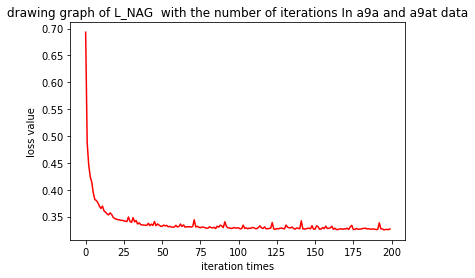

iter 0: valid_loss=0.693147180560079
iter 10: valid_loss=0.4311417122012256
iter 20: valid_loss=0.3777077408546135
iter 30: valid_loss=0.5426517792611711
iter 40: valid_loss=0.36643026538430395
iter 50: valid_loss=0.42294250959753144
iter 60: valid_loss=0.5755588771636636
iter 70: valid_loss=0.6695394741662152
iter 80: valid_loss=0.4567751124544811
iter 90: valid_loss=0.4707055904375611
iter 100: valid_loss=0.3505609445254162
iter 110: valid_loss=0.464838817643041
iter 120: valid_loss=0.34826536524310986
iter 130: valid_loss=0.34646866886781313
iter 140: valid_loss=0.43048597662701754
iter 150: valid_loss=0.48519222402618956
iter 160: valid_loss=0.41011199080214716
iter 170: valid_loss=0.4373878386051951
iter 180: valid_loss=0.3888578084772572
iter 190: valid_loss=0.39718972008044806


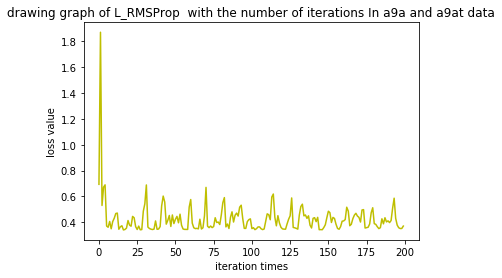

iter 0: valid_loss=0.693147180560079
iter 10: valid_loss=0.6814584689232671
iter 20: valid_loss=0.6705375927808243
iter 30: valid_loss=0.6593595705153741
iter 40: valid_loss=0.6492759003016974
iter 50: valid_loss=0.6392249895485279
iter 60: valid_loss=0.6298715167778555
iter 70: valid_loss=0.6200219941190455
iter 80: valid_loss=0.6116875136123971
iter 90: valid_loss=0.6033243342582716
iter 100: valid_loss=0.5953736713264672
iter 110: valid_loss=0.5872937168465884
iter 120: valid_loss=0.5796753703614163
iter 130: valid_loss=0.5722534377131188
iter 140: valid_loss=0.5653658301703121
iter 150: valid_loss=0.5588872223909358
iter 160: valid_loss=0.5528161701826936
iter 170: valid_loss=0.5466654485976955
iter 180: valid_loss=0.5408329585536857
iter 190: valid_loss=0.5350162750910048


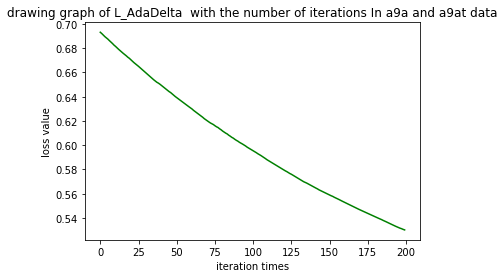

iter 0: valid_loss=0.693147180560079
iter 10: valid_loss=0.6599335420507544
iter 20: valid_loss=0.630545429925415
iter 30: valid_loss=0.6045222961264153
iter 40: valid_loss=0.5816042134298568
iter 50: valid_loss=0.5611713669520687
iter 60: valid_loss=0.5431723678513589
iter 70: valid_loss=0.5274321681839108
iter 80: valid_loss=0.5135599465923839
iter 90: valid_loss=0.5014099720661402
iter 100: valid_loss=0.4905188150044363
iter 110: valid_loss=0.48086490746835064
iter 120: valid_loss=0.47235567996228245
iter 130: valid_loss=0.46468809514711745
iter 140: valid_loss=0.4576662458390286
iter 150: valid_loss=0.45100744919063696
iter 160: valid_loss=0.4449008134284623
iter 170: valid_loss=0.4390611677519964
iter 180: valid_loss=0.433355934600299
iter 190: valid_loss=0.42803200762033605


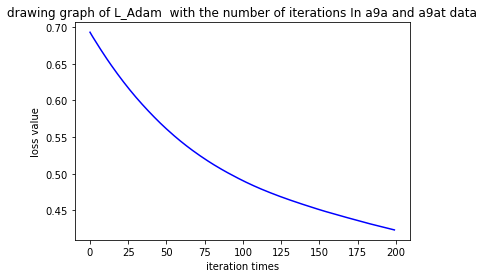

In [36]:
if __name__ =='__main__':

    NAG_logistic_regression()
    RMSProp_logistic_regression()
    AdaDelta_logistic_regression()
    Adam_logistic_regression()